<a href="https://colab.research.google.com/github/chamatt/Computer-Vision-Course/blob/master/07%20-%20Convolutional%20Neural%20Networks/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
import random

### Getting to know our data (MNIST Dataset)

In [0]:
np.random.seed(0)

In [0]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()

In [0]:
print(X_train.shape)
print(X_test.shape)

In [0]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

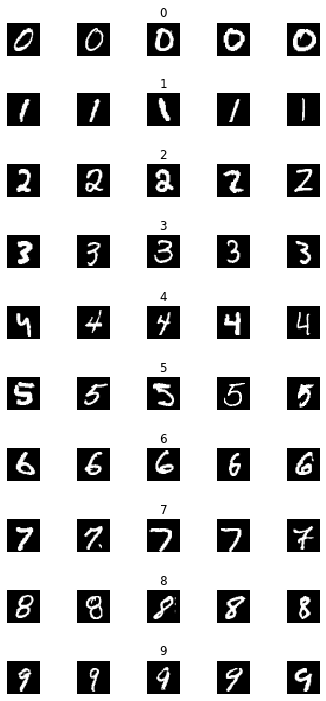

In [8]:
num_of_samples=[]
cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))


[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


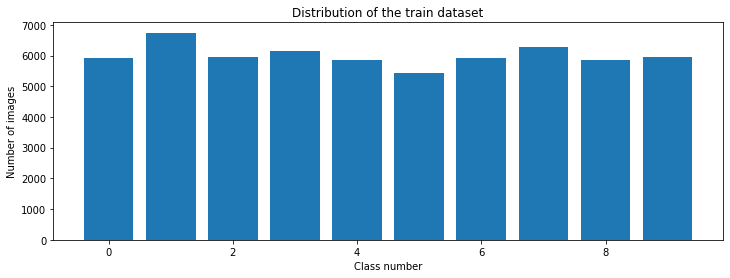

In [9]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [0]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [0]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [0]:
X_train = X_train/255
X_test = X_test/255

### Defining a convolutional network model using the LeNet Architecture
  It consists of the following layers:
1.   Input Layer 
2.   Conv2D (30 layers, 5x5 kernels, relu activation function)
3.   Pooling layer (Max of 2x2 window)
4.   Conv2D (15 layers, 3x3 kernels, relu activation function)
5.   Pooling layer (Max of 2x2 window)
6.   Dense Fully Connected Layer (500 perceptrons, relu activation function)
7.   Output Layer (10 categories, softmax)

In [0]:
def leNet_model():
  model = Sequential()
  model.add(Conv2D(30, (5,5), input_shape=(28,28,1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15, (3,3), activation='relu'))
  model.add(MaxPooling2D((2,2)))
  model.add(Flatten())
  model.add(Dense(units=500,activation='relu'))
  model.add(Dense(units=10, activation='softmax'))
  model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [40]:
model = leNet_model()
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               188000    
_________________________________________________________________
dense_3 (Dense)              (None, 10)              

In [41]:
history = model.fit(x=X_train, y=y_train, epochs=10, validation_split=0.1, batch_size=400, verbose=1, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 8s 148us/sample - loss: 0.1942 - acc: 0.9384 - val_loss: 0.0519 - val_acc: 0.9852
Epoch 2/10
54000/54000 [==============================] - 1s 18us/sample - loss: 0.0471 - acc: 0.9852 - val_loss: 0.0405 - val_acc: 0.9890
Epoch 3/10
54000/54000 [==============================] - 1s 18us/sample - loss: 0.0409 - acc: 0.9874 - val_loss: 0.0361 - val_acc: 0.9893
Epoch 4/10
54000/54000 [==============================] - 1s 18us/sample - loss: 0.0303 - acc: 0.9899 - val_loss: 0.0463 - val_acc: 0.9875
Epoch 5/10
54000/54000 [==============================] - 1s 18us/sample - loss: 0.0253 - acc: 0.9916 - val_loss: 0.0469 - val_acc: 0.9877
Epoch 6/10
54000/54000 [==============================] - 1s 18us/sample - loss: 0.0196 - acc: 0.9936 - val_loss: 0.0452 - val_acc: 0.9880
Epoch 7/10
54000/54000 [==============================] - 1s 18us/sample - loss: 0.0203 - acc: 0.9936 - val_loss: 0.

### Plotting Loss and Accuracy

Text(0.5, 0, 'epoch')

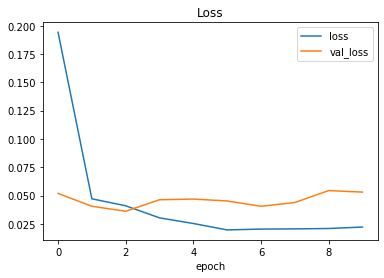

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

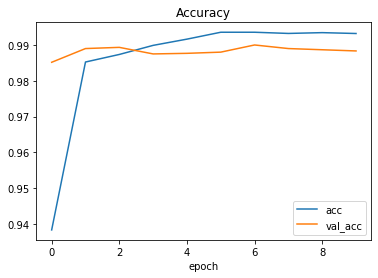

In [43]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

### Testing the model on the TEST set

In [83]:
score = model.evaluate(X_test, y_test, verbose=0)
print(f"Test score: {score[0] : .3f}%")
print(f"Test accuracy: {score[1] : .3f}%")

Test score:  0.064%
Test accuracy:  0.985%


### Auxiliary functions to get user input

In [0]:
import requests
import PIL.Image
from io import BytesIO
import cv2

def predict(img_url=None, drawing=None):
  if drawing is not None:
     img = PIL.Image.open(BytesIO(b64decode(drawing)))
  else:
    response = requests.get(img_url, stream=True)
    img = PIL.Image.open(response.raw)
  img_array = np.asarray(img)
  resized = cv2.resize(img_array, (28,28))
  try:
    gray_scale = cv2.cvtColor(resized, cv2.COLOR_RGBA2GRAY)
  except:
    gray_scale = resized

  image = cv2.bitwise_not(gray_scale)

  plt.imshow(gray_scale, cmap=plt.get_cmap("gray"))
  image = image / 255
  image = image.reshape(1, 28, 28, 1)
  prediction = model.predict_classes(image)
  print('predicted digit: ', str(prediction))

from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode

canvas_html = """
<canvas style="border: 1px solid red" width=%d height=%d></canvas>
<button>Finish</button>
<script>
var canvas = document.querySelector('canvas')
var ctx = canvas.getContext('2d')
ctx.fillStyle = "white";
ctx.fillRect(0, 0, canvas.width, canvas.height);
ctx.lineWidth = %d
ctx.lineCap = "round";
var button = document.querySelector('button')
var mouse = {x: 0, y: 0}
canvas.addEventListener('mousemove', function(e) {
  mouse.x = e.pageX - this.offsetLeft
  mouse.y = e.pageY - this.offsetTop
})
canvas.onmousedown = ()=>{
  ctx.beginPath()
  ctx.moveTo(mouse.x, mouse.y)
  canvas.addEventListener('mousemove', onPaint)
}
canvas.onmouseup = ()=>{
  canvas.removeEventListener('mousemove', onPaint)
}
var onPaint = ()=>{
  ctx.lineTo(mouse.x, mouse.y)
  ctx.stroke()
}
var data = new Promise(resolve=>{
  button.onclick = ()=>{
    resolve(canvas.toDataURL('image/png'))
  }
})
</script>
"""
def draw(filename='drawing.png', w=140, h=140, line_width=30):
  display(HTML(canvas_html % (w, h, line_width)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  return data.split(',')[1]

### Predicting using user input

predicted digit:  [5]


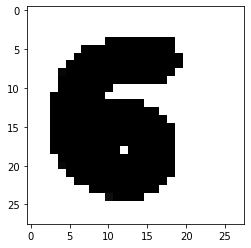

In [94]:
drawing = draw()
predict(drawing=drawing)